In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from sklearn import metrics

C:\Users\AKINDILENI DAYO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
data.shape

(92016, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
data.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
data.duplicated().values.sum()

0

In [7]:
data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
# change Fulltime from object to datetime
data["FullDate"] = pd.to_datetime(data["FullDate"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [10]:
# Make FullDate as index
data.set_index("FullDate", inplace=True)

In [11]:
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [12]:
data_copy = data.copy()

In [13]:
data_copy1 = data_copy.drop(columns=["Tmax", "SysLoad", "GasPrice"])
data_copy1.head()

,ElecPrice
FullDate,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


In [14]:
daily_df = data_copy.resample('D').sum()
daily_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Text(0, 0.5, 'Electric Price')

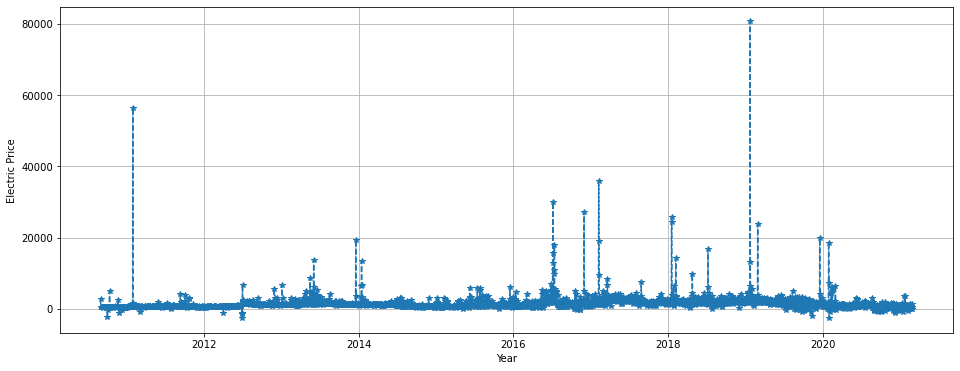

In [15]:
plt.figure(figsize=(16,6))
plt.plot(daily_df.index, daily_df['ElecPrice'],'--',marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electric Price')

# Q12

In [16]:
# Display the information of ADF test
def show_adfuller(adfull):
    print(f'ADF Statistic: {adfull[0]}')
    print(f'p-value: {adfull[1]}')
    print(f'No. of lags used: {adfull[2]}')
    print(f'No. of observations used : {adfull[3]}')
    print('Critical Values:')
    for k, v in adfull[4].items():
        print(f' {k}: {v}')

In [17]:
sys_adf_result = adfuller(daily_df['SysLoad'])
gas_adf_result = adfuller(daily_df['GasPrice'])

In [18]:
show_adfuller(sys_adf_result)

ADF Statistic: -3.690158988836647
p-value: 0.004253725504574104
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [19]:
sys = sys_adf_result[1]
round(sys,6)

0.004254

In [20]:
show_adfuller(gas_adf_result)

ADF Statistic: -2.9027666971651813
p-value: 0.045027212884625245
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [21]:
gas = gas_adf_result[1]
round(gas,6)

0.045027

In [22]:
elec_adf_result = adfuller(daily_df['ElecPrice'])
show_adfuller(elec_adf_result)

ADF Statistic: -8.26905386687381
p-value: 4.848817773711457e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


In [23]:
c = elec_adf_result[1]
c

4.848817773711457e-13

# 13

In [24]:
gas_critical_value = round(gas_adf_result[4]["5%"], 4)
gas_critical_value

-2.8623

In [25]:
elec_critical_value = round(elec_adf_result[4]["10%"], 4)
elec_critical_value

-2.5672

# 14

In [26]:
# data split to train and test 
X_train = daily_df.iloc[:2757]
X_test = daily_df.iloc[2757:]
print(f"train: {X_train.shape}")
print(f"test: {X_test.shape}")

train: (2757, 4)
test: (1077, 4)


In [27]:
X_train.reset_index(inplace = True)
X_train.head(1)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.7


In [28]:
X_test.reset_index(inplace = True)
X_test.head(1)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.9113,201.588,1833.0


In [29]:
X_train_1 = X_train.drop(columns=["Tmax", "SysLoad", "GasPrice"], axis=1)
X_train_1.rename(columns ={"FullDate": "ds", "ElecPrice": "y"}, inplace=True)

In [30]:
X_train_1.head(2)

,ds,y
0,2010-09-01,2751.70
1,2010-09-02,570.81


In [31]:
X_test_1 = X_test.drop(columns=["Tmax", "SysLoad", "GasPrice"], axis=1)
X_test_1.rename(columns ={"FullDate": "ds", "ElecPrice": "y"}, inplace=True)

In [32]:
X_test_1.head(2)

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49


In [33]:
model = Prophet()
model.fit(X_train_1)

forecast_val = model.predict(X_test_1) 
forecast_val.head()

05:54:55 - cmdstanpy - INFO - Chain [1] start processing
05:54:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2679.523236,185.347655,4917.226786,2679.523236,2679.523236,-154.882441,-154.882441,-154.882441,9.737801,9.737801,9.737801,-164.620241,-164.620241,-164.620241,0.0,0.0,0.0,2524.640796
1,2018-03-21,2680.298031,277.571871,5042.266562,2680.298031,2680.298031,-2.419802,-2.419802,-2.419802,159.363178,159.363178,159.363178,-161.782980,-161.782980,-161.782980,0.0,0.0,0.0,2677.878229
2,2018-03-22,2681.072826,435.816435,5190.543433,2681.072826,2681.072826,95.746291,95.746291,95.746291,257.127937,257.127937,257.127937,-161.381646,-161.381646,-161.381646,0.0,0.0,0.0,2776.819117
3,2018-03-23,2681.847620,-9.449901,4881.243828,2681.847620,2681.847620,-112.972998,-112.972998,-112.972998,50.277336,50.277336,50.277336,-163.250334,-163.250334,-163.250334,0.0,0.0,0.0,2568.874622
4,2018-03-24,2682.622415,-65.091118,4607.509807,2682.622415,2682.622415,-438.612511,-438.612511,-438.612511,-271.465795,-271.465795,-271.465795,-167.146716,-167.146716,-167.146716,0.0,0.0,0.0,2244.009904


In [34]:
def Metrics(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [35]:
print("mean absolute percentage error:", Metrics(X_test_1["y"], forecast_val['yhat']))

mean absolute percentage error: 540.8215054992064


In [36]:
rmse = np.sqrt(metrics.mean_squared_error(X_test_1['y'],forecast_val['yhat']))
print("mean absolute percentage error is : ", round(rmse,2))

mean absolute percentage error is :  3200.06


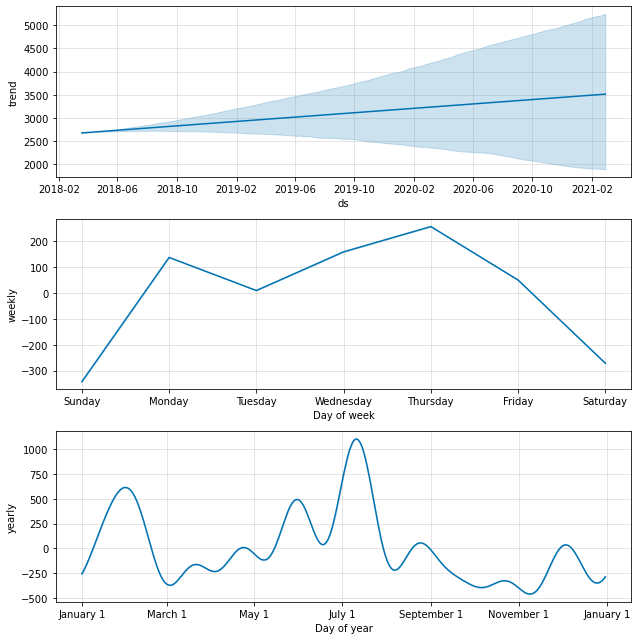

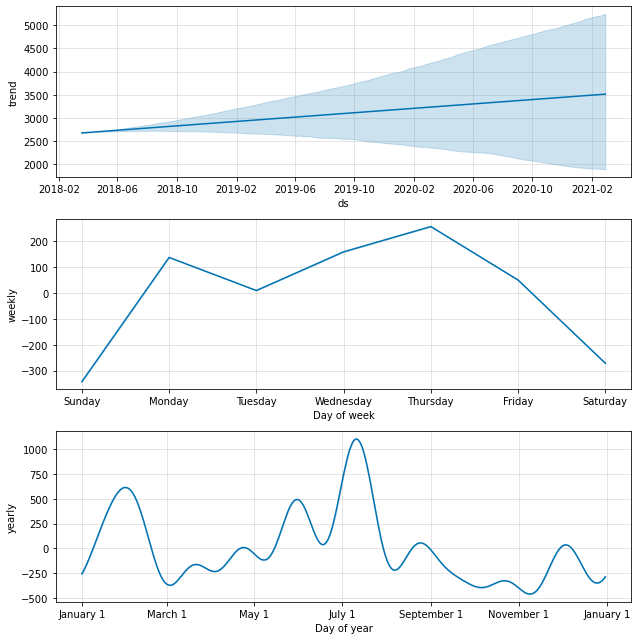

In [37]:
model.plot_components(forecast_val)

In [38]:
data_copy.reset_index(inplace=True)

In [39]:
##Setting the regression and prediction features for training
data_copy_new = data_copy.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3','ElecPrice':'y'})
data_copy_new.head() 

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [40]:
X_train_new = data_copy_new.iloc[:2757,:]
X_test_new = data_copy_new.iloc[2757:,:]

model_new = Prophet()

model_new.add_regressor('add1')
model_new.add_regressor('add2')
model_new.add_regressor('add3')

In [41]:
model_new.fit(X_train_new)

05:56:10 - cmdstanpy - INFO - Chain [1] start processing
05:56:10 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
forecast_values_new = model_new.predict(X_test_new) 
forecast_values_new.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 21:00:00,35.914149,-77.687686,163.469978,35.914149,35.914149,3.807263,3.807263,3.807263,-0.656154,...,3.363668,3.363668,3.363668,2.729201,2.729201,2.729201,0.0,0.0,0.0,36.136267
1,2010-12-24 22:00:00,35.941280,-89.841909,161.898159,35.941280,35.941280,-2.297716,-2.297716,-2.297716,-0.656154,...,-2.741311,-2.741311,-2.741311,3.031334,3.031334,3.031334,0.0,0.0,0.0,32.058325
2,2010-12-24 23:00:00,35.968412,-92.872461,153.522184,35.968412,35.968412,-9.573878,-9.573878,-9.573878,-0.656154,...,-10.017473,-10.017473,-10.017473,3.262845,3.262845,3.262845,0.0,0.0,0.0,28.371264
3,2010-12-25 00:00:00,35.995543,-88.822891,165.476166,35.995543,35.995543,-8.380160,-8.380160,-8.380160,-0.564372,...,-8.731973,-8.731973,-8.731973,3.421047,3.421047,3.421047,0.0,0.0,0.0,31.823028
4,2010-12-25 01:00:00,36.022674,-95.170786,153.772181,36.022674,36.022674,-6.963217,-6.963217,-6.963217,-0.564372,...,-7.315030,-7.315030,-7.315030,3.504228,3.504228,3.504228,0.0,0.0,0.0,32.961436


In [43]:
forecast_values_new.shape

(89259, 31)

In [47]:
mape_new = Metrics(X_test_new['y'],forecast_values_new['yhat'])
print("mean absolute percentage error is : ", round(mape_new,2))

mean absolute percentage error is :  inf


C:\Users\AKINDI~1\AppData\Local\Temp/ipykernel_22204/2875919816.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100


In [48]:
rmse_new = np.sqrt(metrics.mean_squared_error(X_test_new['y'],forecast_values_new['yhat']))
print("mean absolute percentage error is : ", round(rmse_new,2))

mean absolute percentage error is :  1372.81


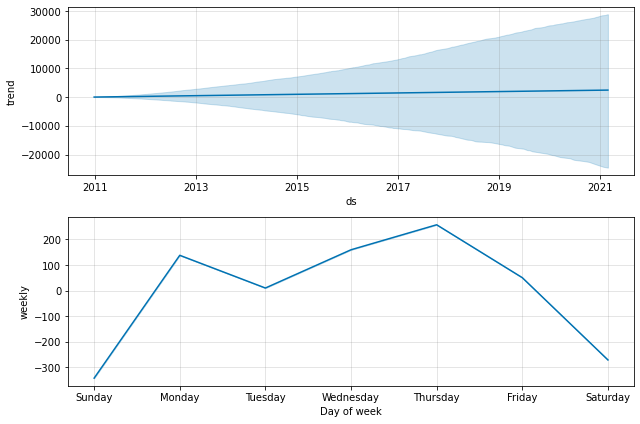

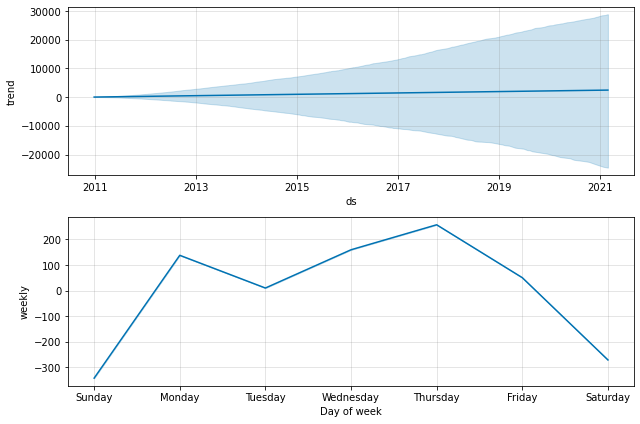

In [49]:
model.plot_components(forecast_values_new)